<a href="https://colab.research.google.com/github/Adeve903/ML-Regression-Project/blob/main/Regression_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###PROBLEM STATEMENT
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

####Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [2]:
#Mounting all important modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Linear/CarPrice_project.csv')

###DATA INSPECTION

In [5]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
dataset.shape

(205, 26)

In [7]:
dataset.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

###Dataset Information

Car_ID: Unique id of each observation (Interger)

Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

CarName: Name of car company (Categorical)

fueltype: Car fuel type i.e gas or diesel (Categorical)

aspiration: Aspiration used in a car (Categorical)

doornumber: Number of doors in a car (Categorical)

carbody: body of car (Categorical)

drivewheel: type of drive wheel (Categorical)

enginelocation: Location of car engine (Categorical)

wheelbase: Weelbase of car (Numeric)

carlength: Length of car (Numeric)

carwidth: Width of car (Numeric)

carheight: height of car (Numeric)

curbweight: The weight of a car without occupants or baggage. (Numeric)

enginetype: Type of engine. (Categorical)

cylindernumber: cylinder placed in the car (Categorical)

enginesize: Size of car (Numeric)

fuelsystem: Fuel system of car (Categorical)

boreratio: Boreratio of car (Numeric)

stroke: Stroke or volume inside the engine (Numeric)

compressionratio: compression ratio of car (Numeric)

horsepower: Horsepower (Numeric)

peakrpm: car peak rpm (Numeric)

citympg: Mileage in city (Numeric)

highwaympg: Mileage on highway (Numeric)

price(Dependent variable): Price of car (Numeric)

In [9]:
dataset.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [10]:
#Finding Duplicate
len(dataset[dataset.duplicated()])


0

In [11]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

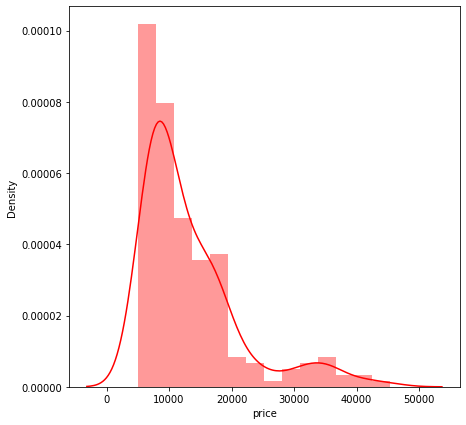

In [12]:
#Dependent variable 'Price'
plt.figure(figsize = (7,7))
sns.distplot(dataset['price'],color = 'r')

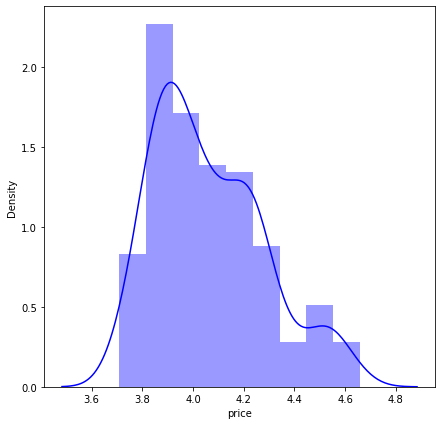

In [13]:
#As it is moderately right skewed we will use log10 transformation
plt.figure(figsize = (7,7))
sns.distplot(np.log10(dataset['price']),color = 'b')

In [14]:
numeric_features = dataset.describe().columns
numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

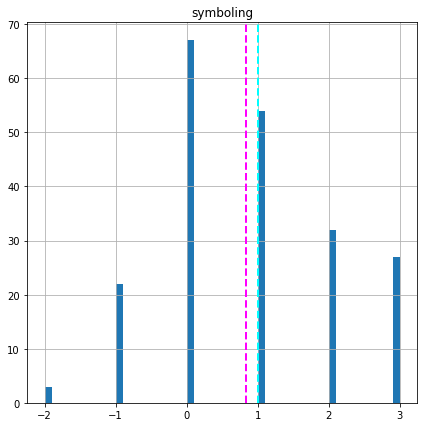

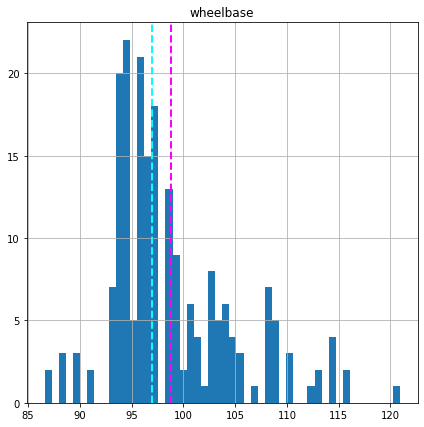

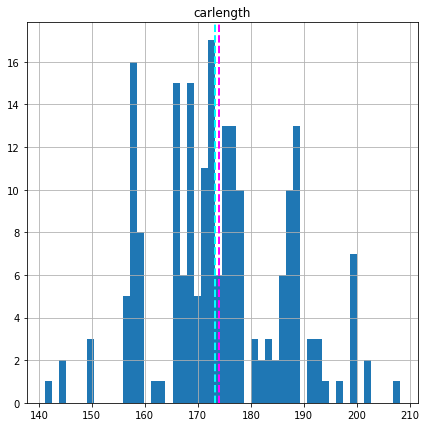

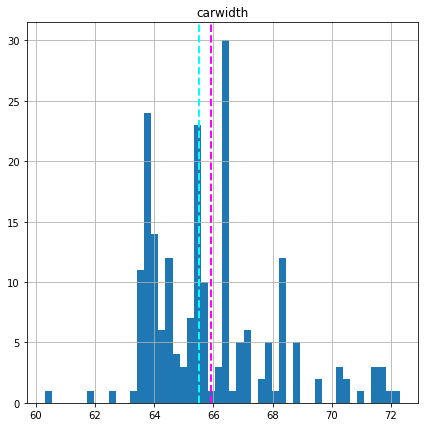

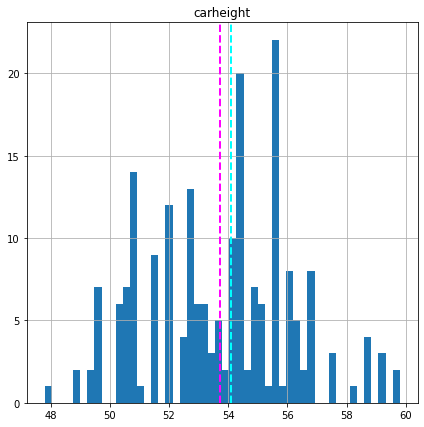

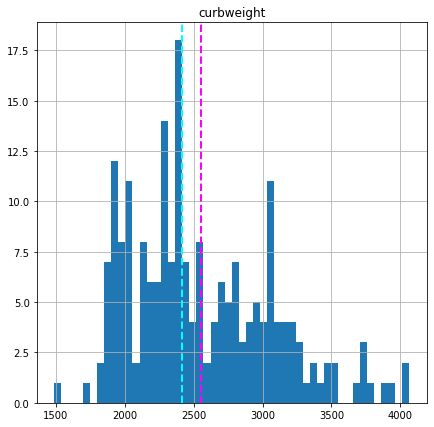

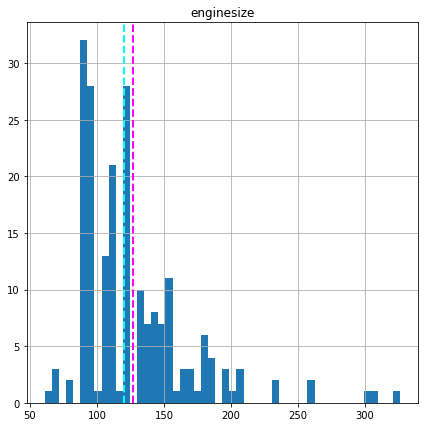

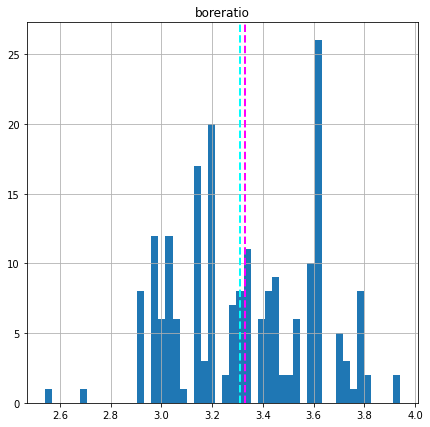

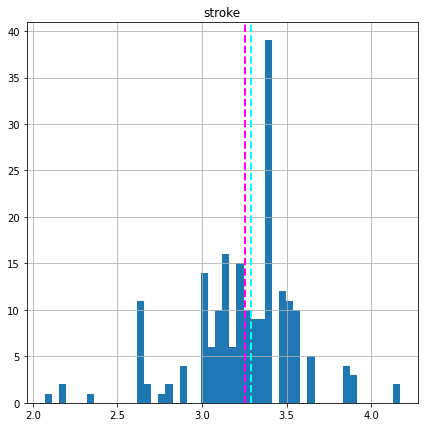

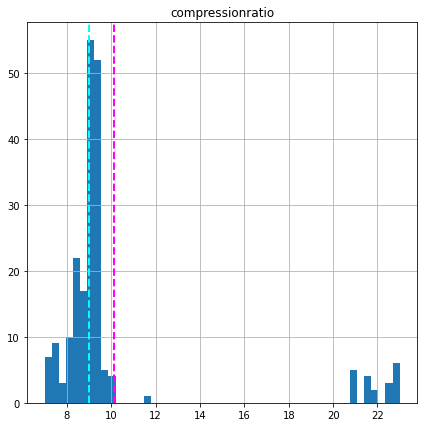

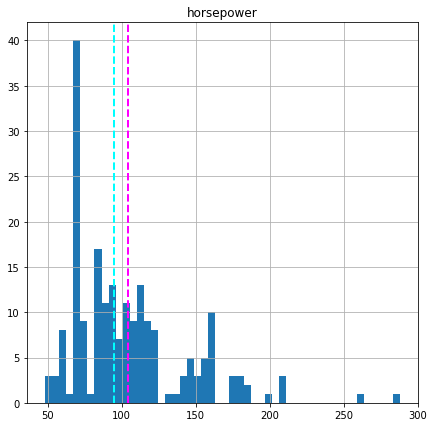

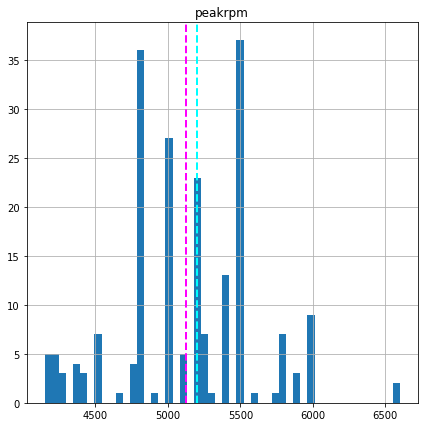

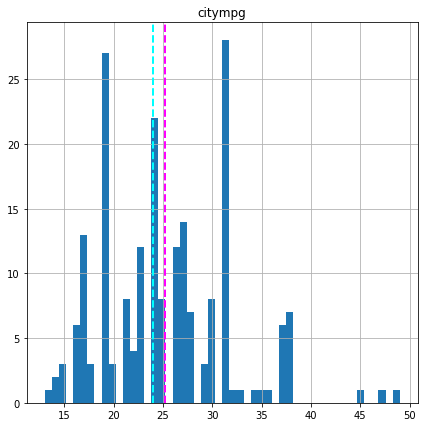

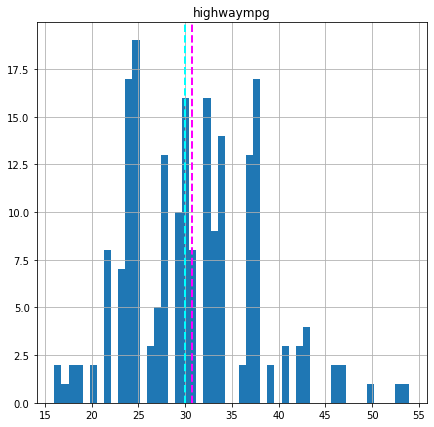

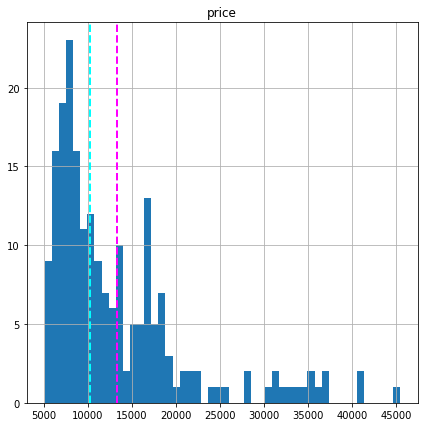

In [15]:
#Plotting the graph for all numeric features
for col in numeric_features[1:]:
  fig = plt.figure(figsize = (7,7))
  ax = fig.gca()
  feature = dataset[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

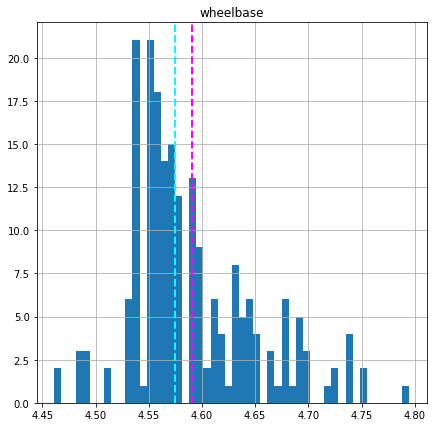

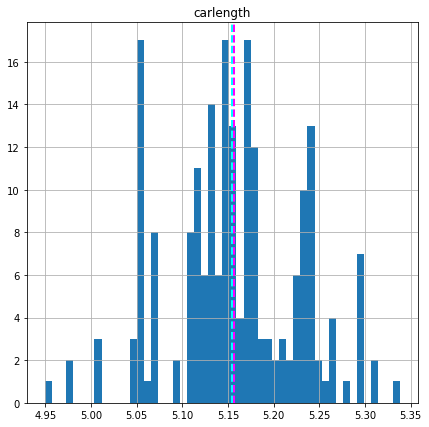

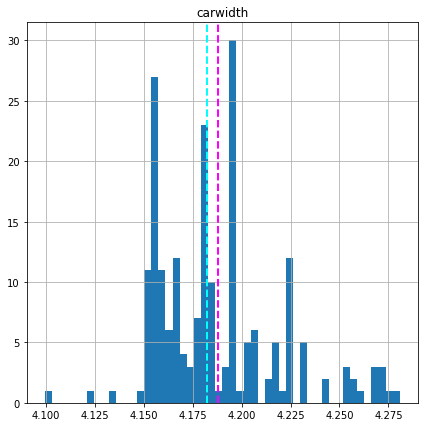

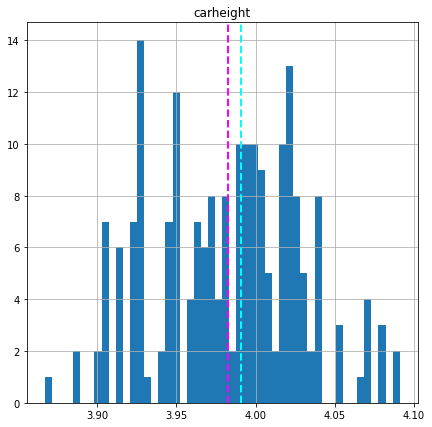

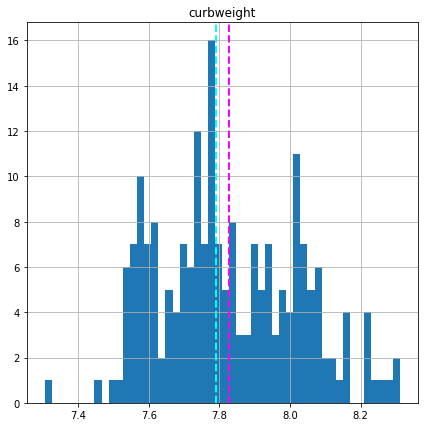

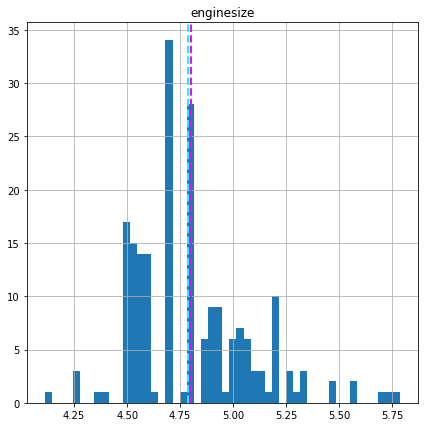

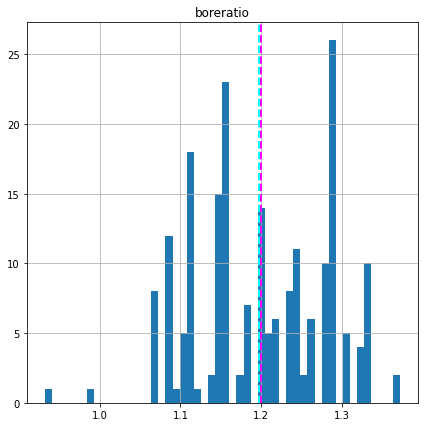

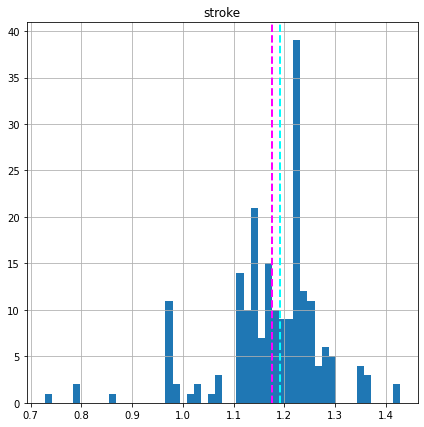

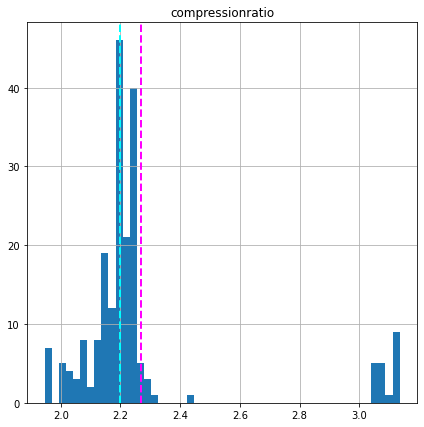

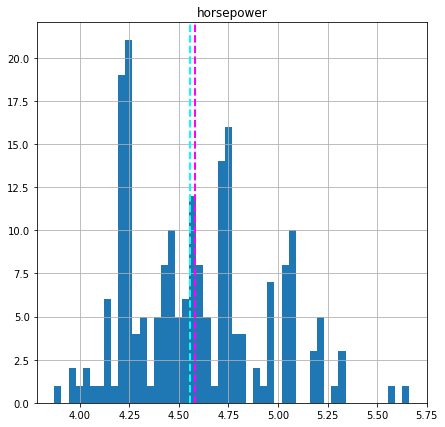

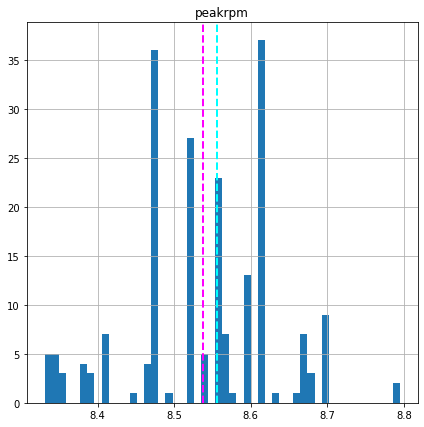

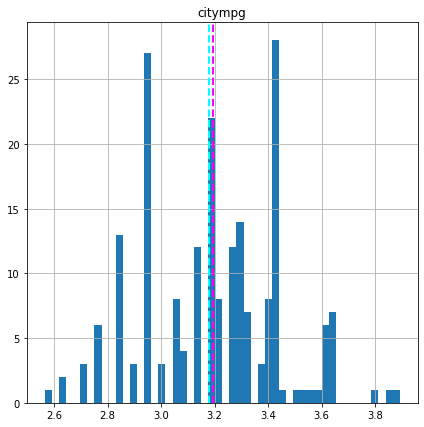

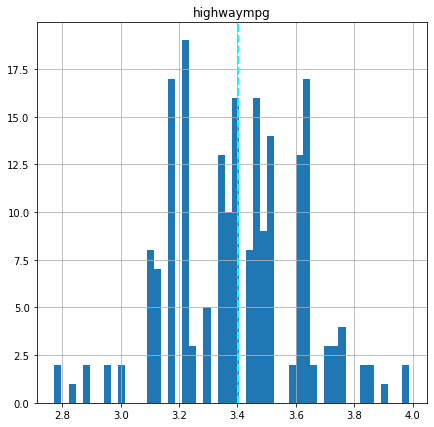

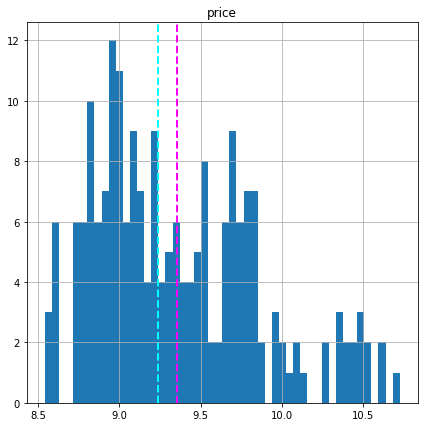

In [16]:
#Log transformation on all the numeric features to make it near to normal distribution
for col in numeric_features[2:]:
  fig = plt.figure(figsize = (7,7))
  ax = fig.gca()
  feature = np.log(dataset[col])
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

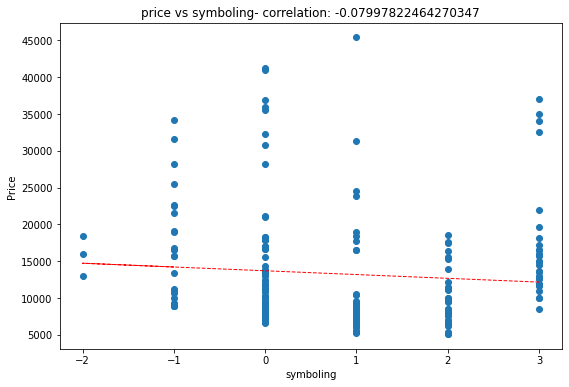

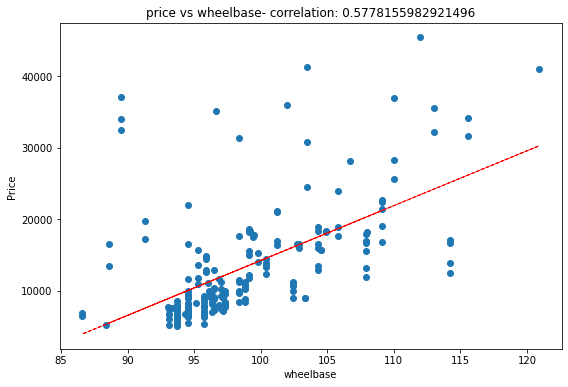

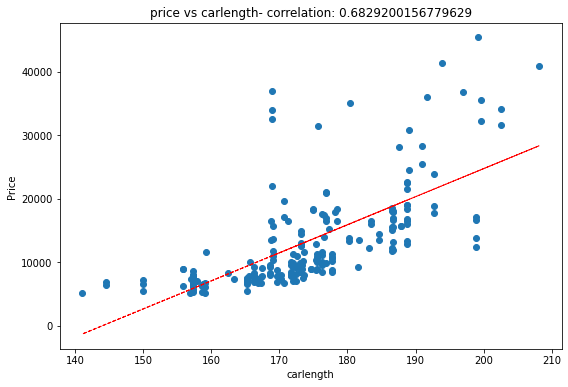

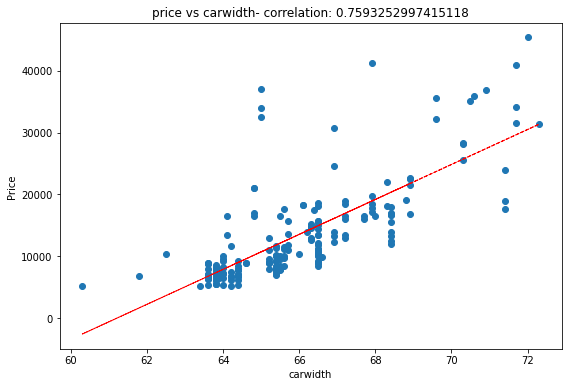

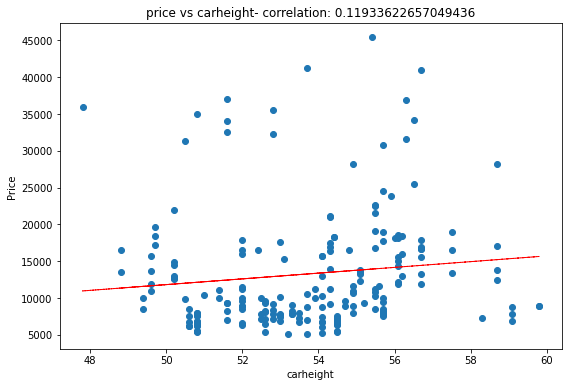

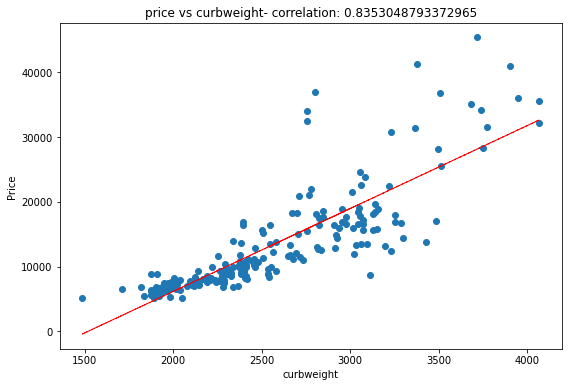

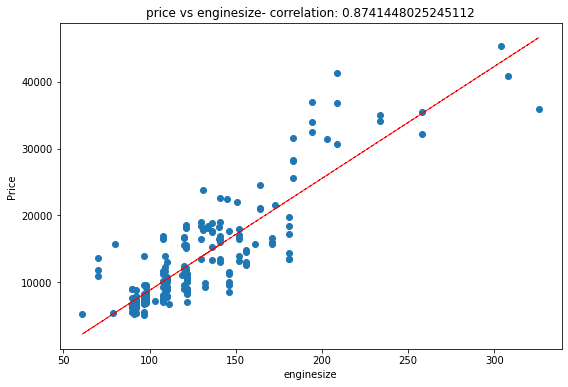

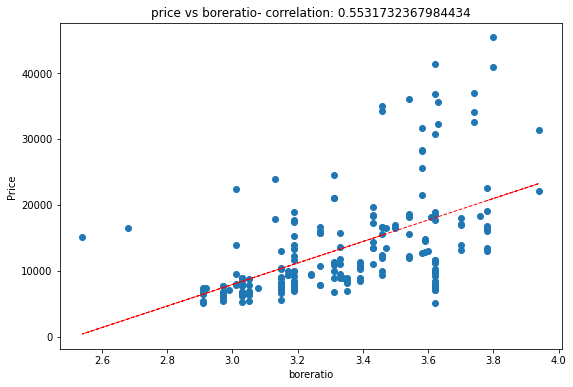

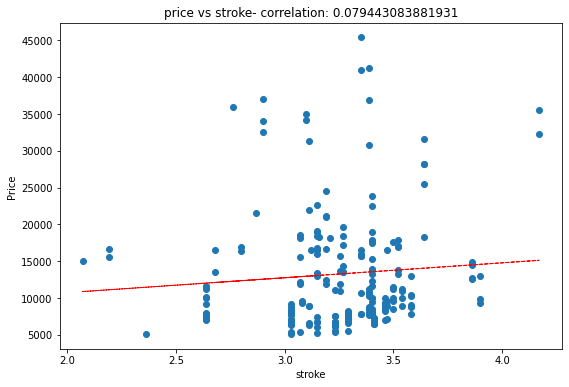

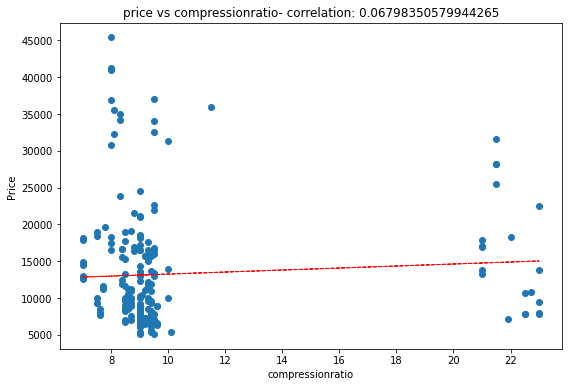

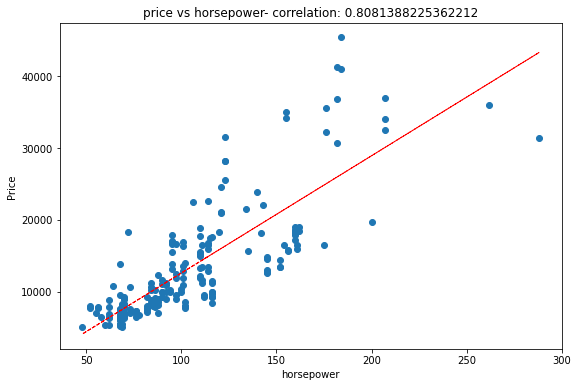

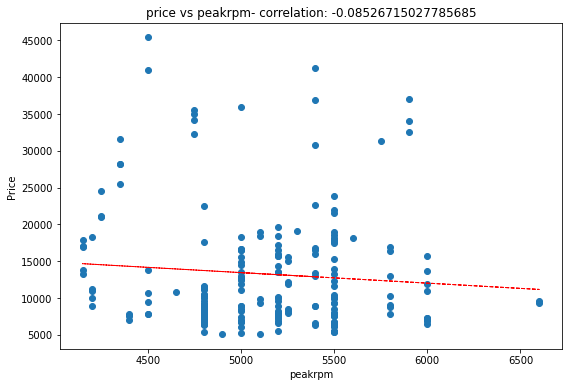

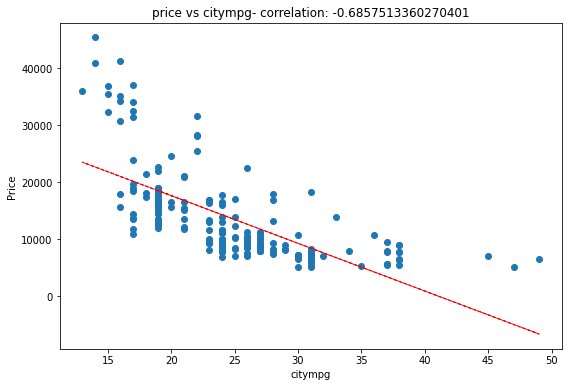

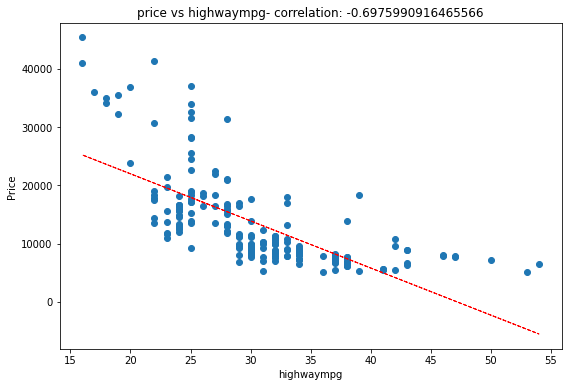

In [17]:
#Plotting the graph to know how the independent variables impact the dependent variable(price)
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

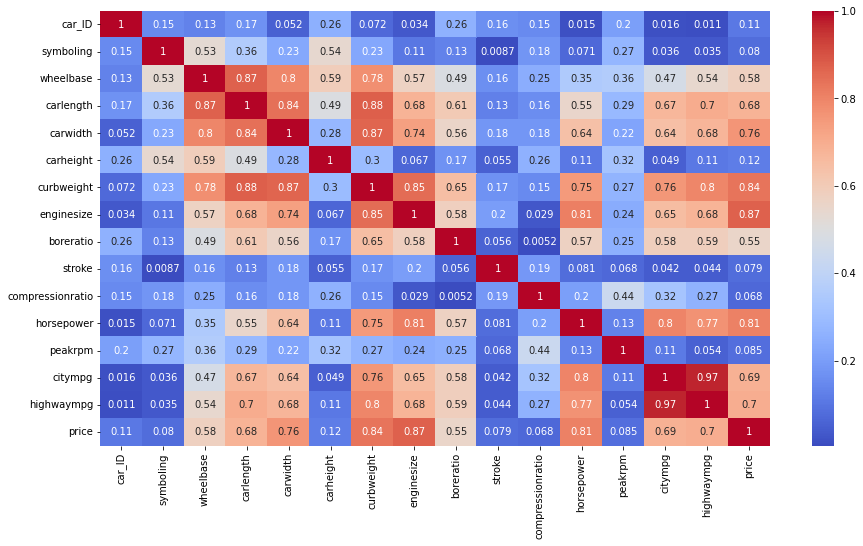

In [18]:
#Correlation graph to see the relation between different column variable
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [19]:
#Removing Multicollinear
dataset['mileage'] = 0.6 * dataset['citympg'] + 0.4 * dataset['highwaympg']
dataset['car_area'] = dataset['carlength'] + dataset['carwidth']

In [20]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
#Calculating VIF to know the correaltion of a variable with a group of other variable
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price']]])

,variables,VIF
0,symboling,2.540920
1,wheelbase,2254.716977
2,carlength,inf
3,carwidth,inf
4,carheight,929.458469
5,curbweight,403.471933
6,enginesize,68.872234
7,boreratio,291.357019
8,stroke,126.412487
9,compressionratio,15.834999


In [22]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price',"carlength","carwidth","citympg","highwaympg","wheelbase","carheight","car_area"]]])

,variables,VIF
0,symboling,1.814953
1,curbweight,198.427552
2,enginesize,65.617706
3,boreratio,187.712520
4,stroke,112.853620
5,compressionratio,15.189976
6,horsepower,48.625774
7,peakrpm,137.896263
8,mileage,65.810022


In [23]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','symboling','price','citympg','highwaympg','company_cat','price_mean','carwidth','carlength','carheight','car_vol','car_den','wheelbase','car_area','peakrpm','stroke','horsepower','boreratio','curbweight']]])

,variables,VIF
0,enginesize,5.170320
1,compressionratio,9.119143
2,mileage,8.201171


In [24]:
numerical_features = ['enginesize','compressionratio','mileage']

In [25]:
dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [26]:
dataset['company'] = dataset['CarName'].str.split(" ", expand=True)[0]
dataset['company'] = dataset['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})
dataset['company'] = dataset['company'].str.title()
dataset['company'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Jaguar          3
Chevrolet       3
Alfa-Romero     3
Renault         2
Mercury         1
Name: company, dtype: int64

In [27]:
categorical_features = dataset.describe(include=['object','category']).columns

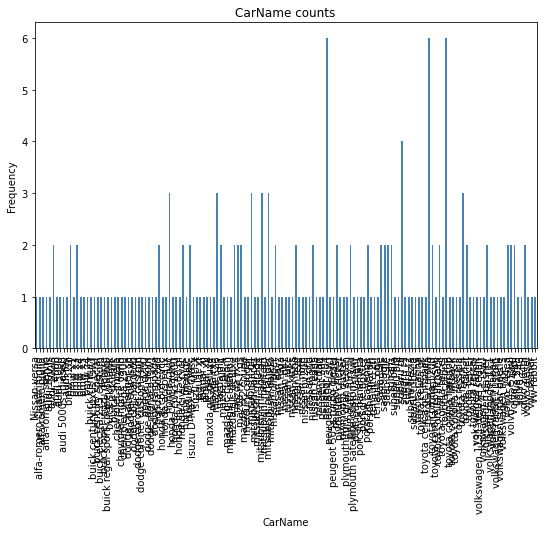

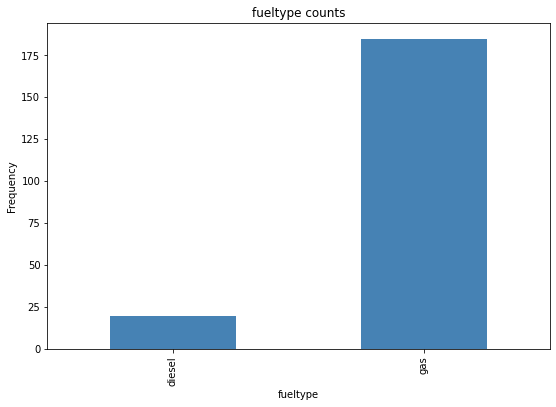

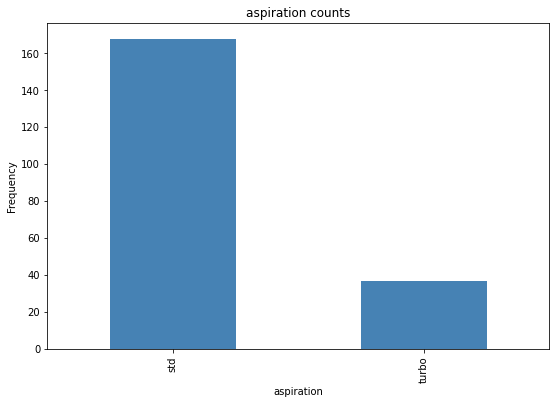

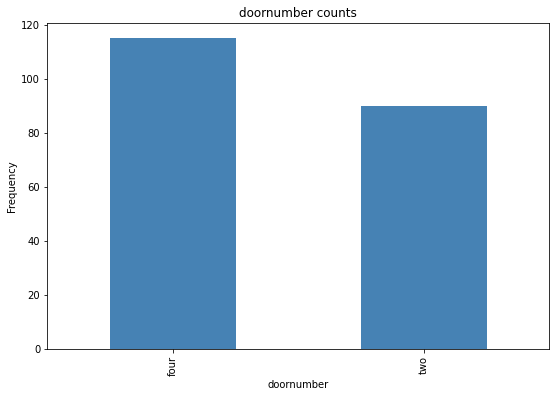

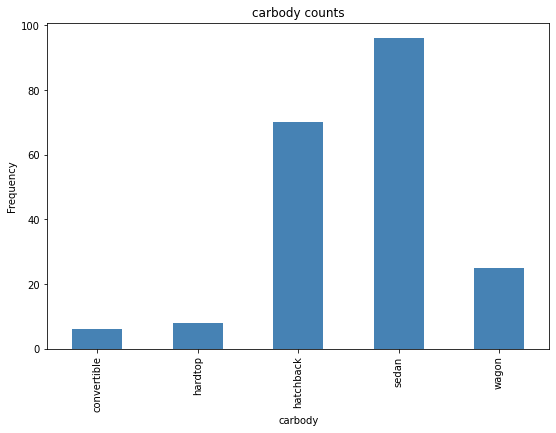

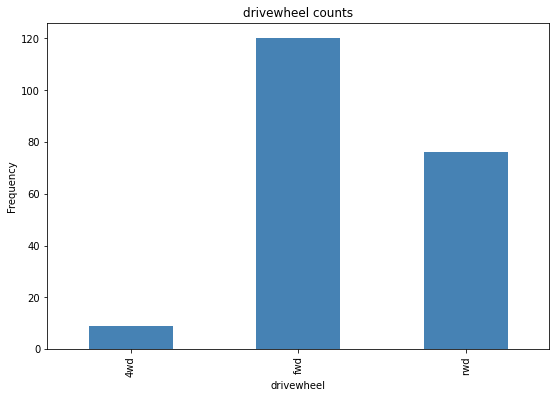

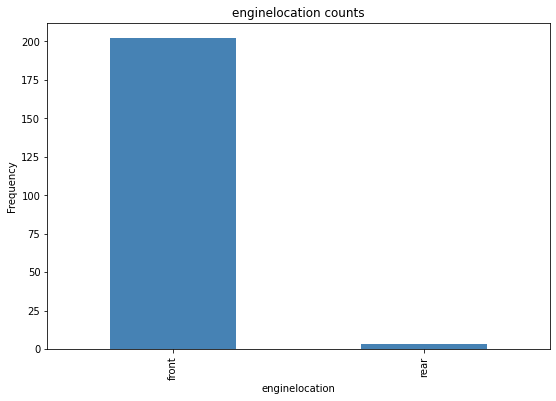

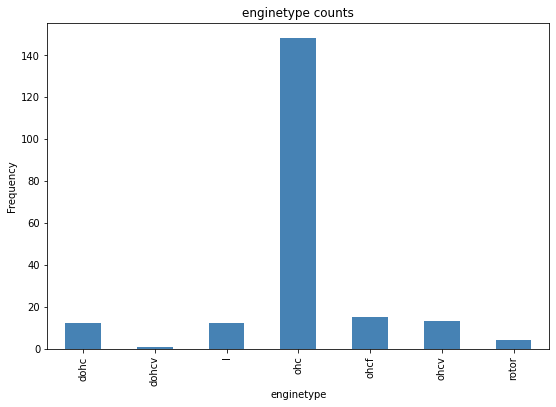

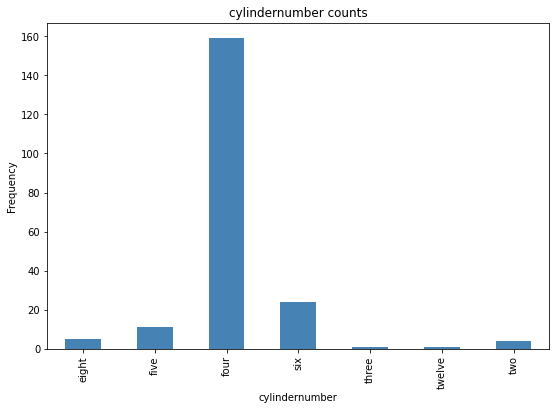

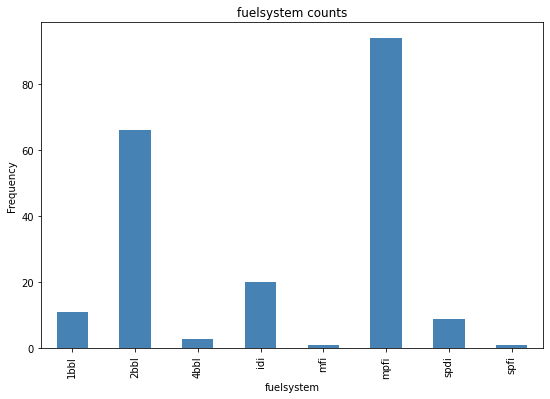

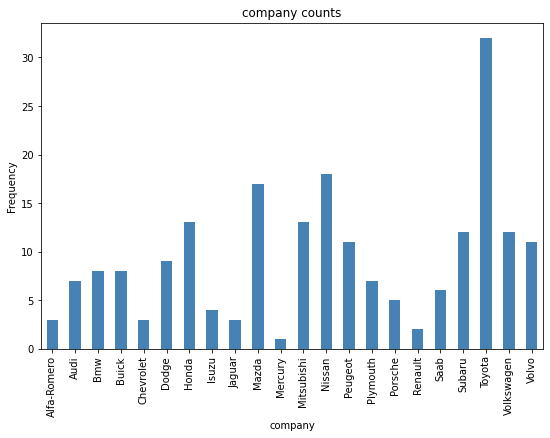

In [28]:
#Plotting the graph for categorical variables
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

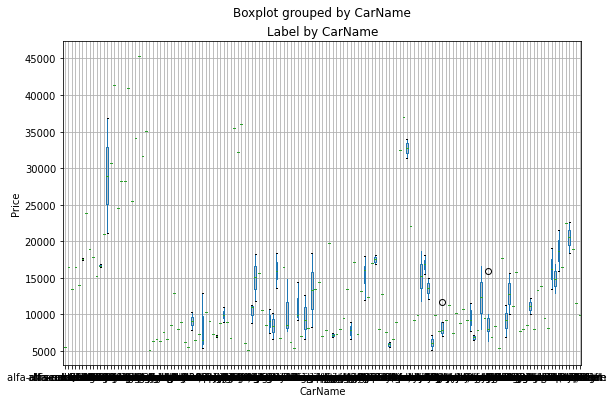

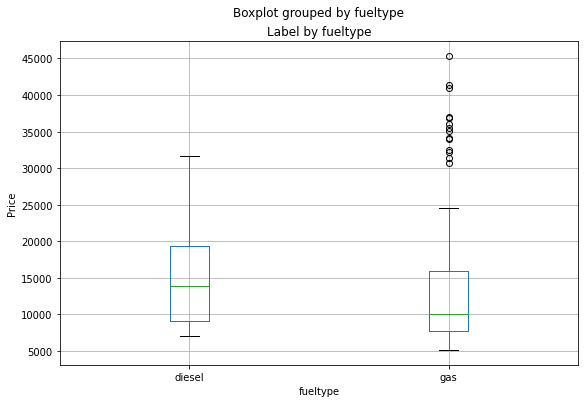

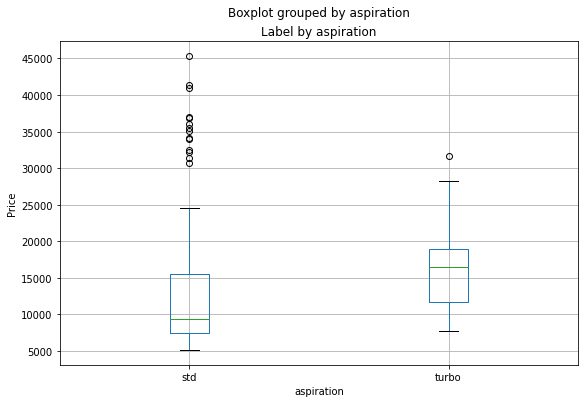

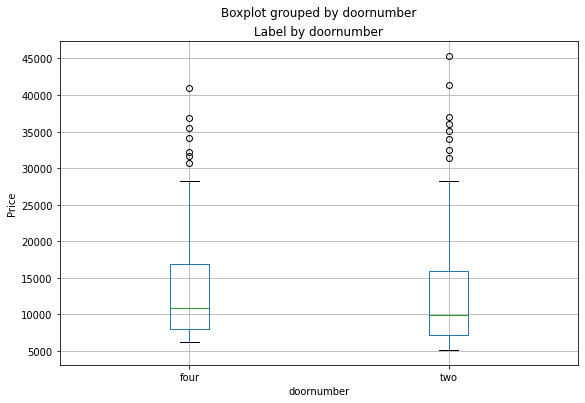

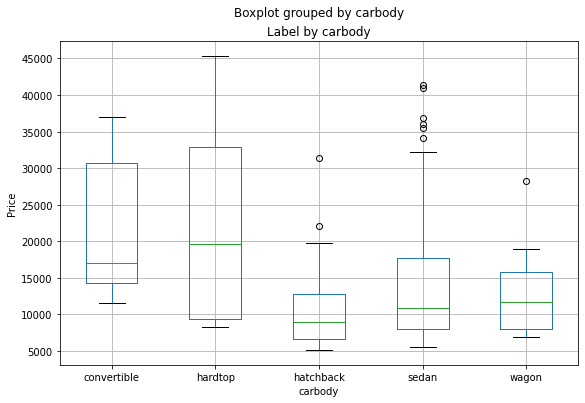

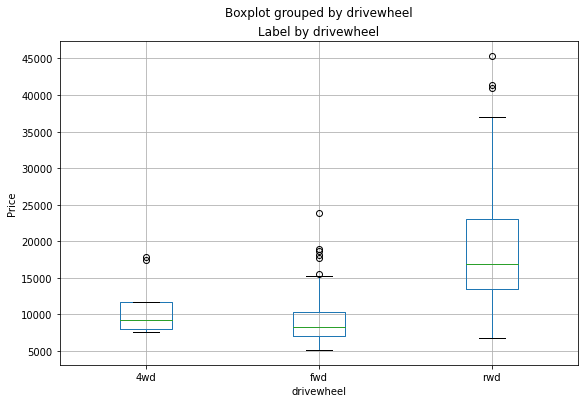

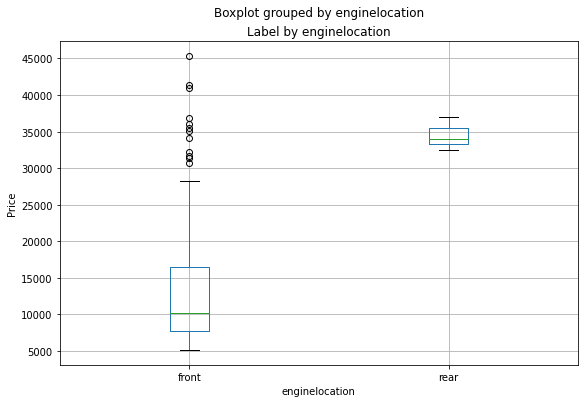

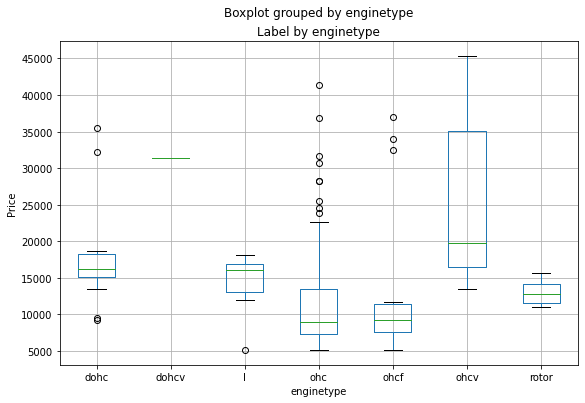

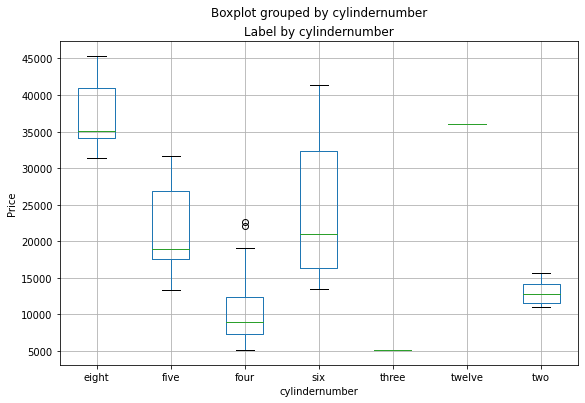

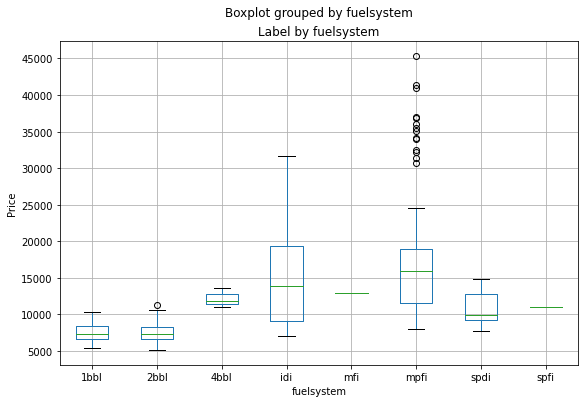

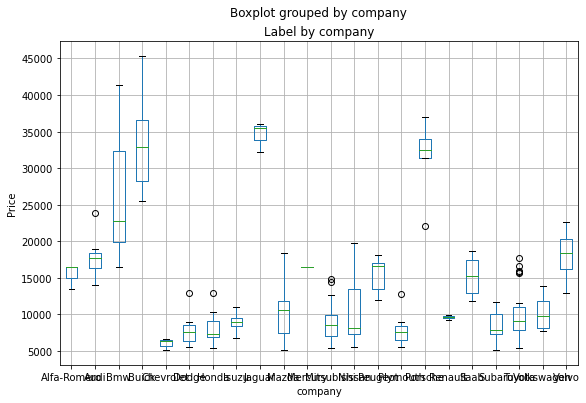

In [29]:
#Plotting the graph to know how the categorical variables will impact dependent variables
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

<Figure size 1440x432 with 0 Axes>

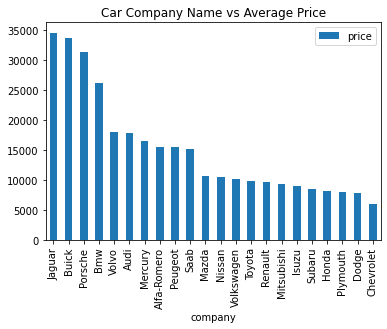

In [30]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(dataset.groupby(['company'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [31]:
#Renaming price cloumn
df_autox.rename(columns={'price':'price_mean'},inplace=True)

In [32]:

dataset = dataset.merge(df_autox,on = 'company',how = 'left')

In [33]:
#Categorizing company based on their price mean
dataset['company_cat'] = dataset['price_mean'].apply(lambda x : 0 if x < 12000 else (1 if 12000 <= x < 24000 else 2))

In [34]:
correlation.price

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [35]:
#Making a copy of datatset
dataset_pr = dataset.copy()

In [36]:
#Label Encoding
encoders_nums = {"fueltype":{"diesel":1,"gas":0},
                 "aspiration":{"turbo":1,"std":0},
                 "doornumber":     {"four": 4, "two": 2},
                 "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                 "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }
                 }

dataset_pr = dataset_pr.replace(encoders_nums)


In [37]:

#Creating dummies
dataset_pr = pd.get_dummies(dataset_pr, columns=["carbody", "enginetype","fuelsystem"], prefix=["body", "etype","fsystem"])

In [38]:
dataset_pr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,etype_ohcv,etype_rotor,fsystem_1bbl,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mfi,fsystem_mpfi,fsystem_spdi,fsystem_spfi
0,1,3,alfa-romero giulia,0,0,2,1,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,0,0,2,1,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,front,94.5,171.2,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,0,0,4,0,front,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,0,0,4,0,front,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


In [39]:
features = numerical_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat','body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon','etype_dohc', 'etype_l', 'etype_ohc', 'etype_ohcf',
       'etype_ohcv','fsystem_1bbl', 'fsystem_2bbl'
       , 'fsystem_idi', 'fsystem_mpfi',
       'fsystem_spdi'])

In [40]:
features

['enginesize',
 'compressionratio',
 'mileage',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'cylindernumber',
 'company_cat',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'etype_dohc',
 'etype_l',
 'etype_ohc',
 'etype_ohcf',
 'etype_ohcv',
 'fsystem_1bbl',
 'fsystem_2bbl',
 'fsystem_idi',
 'fsystem_mpfi',
 'fsystem_spdi']

In [41]:
from scipy.stats import zscore
X = dataset_pr[features].apply(zscore)

In [42]:
y = np.log10(dataset_pr['price'])

In [43]:
#Train Test Split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(164, 24)
(41, 24)


In [44]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [45]:
reg.score(X_train, y_train)

0.9324420504983304

In [46]:
reg.coef_

array([ 0.07683825,  0.01590146, -0.05608906,  0.00149697,  0.02135358,
        0.01543893,  0.01238109,  0.00031735,  0.06565892,  0.01437322,
        0.0005336 , -0.00028112,  0.00042538, -0.00796079, -0.04125975,
       -0.05110849, -0.0658886 , -0.03672994, -0.04472375, -0.00052948,
       -0.01768536,  0.00149697,  0.01790728, -0.00753211])

In [47]:
y_pred = reg.predict(X_test)

In [48]:
y_pred

array([3.81967552, 4.13714622, 4.17646819, 3.56301623, 4.00910128,
       4.0881102 , 3.78244388, 3.86958683, 4.15481411, 3.87647818,
       4.3307769 , 4.57347531, 4.11445435, 4.05412396, 3.80023554,
       4.08476194, 4.03989491, 4.18239791, 3.92761811, 3.85263527,
       3.97322164, 4.13566249, 4.03251989, 4.08476194, 4.14866948,
       3.84357219, 3.87365512, 4.11048216, 3.89255312, 3.8372148 ,
       3.96211116, 3.98838418, 4.32026565, 4.00589168, 3.86832486,
       4.45577252, 4.07673423, 4.17242568, 3.81943108, 4.62804648,
       3.76912549])

In [49]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 8981848.585185645
RMSE : 2996.9732373155493


In [50]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8839799650687874
Adjusted R2 :  0.7099499126719685


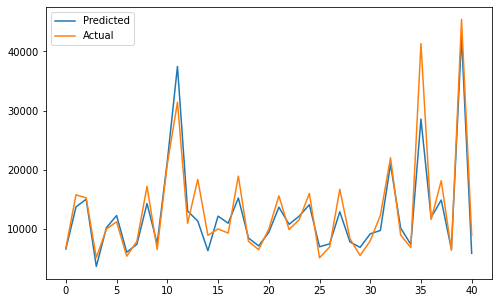

In [51]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [52]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [53]:
lasso.score(X_train, y_train)

0.9323894941242676

In [54]:
lasso.coef_

array([ 7.54996107e-02,  1.76495698e-02, -5.73230920e-02,  2.83183717e-04,
        2.08047413e-02,  1.51629600e-02,  1.27564111e-02, -2.98433685e-07,
        6.58755500e-02,  1.39349965e-02,  2.01132186e-04, -5.55941589e-04,
        0.00000000e+00, -8.22974529e-03, -3.72659868e-02, -4.72331329e-02,
       -5.86541464e-02, -3.23527904e-02, -4.02082946e-02, -1.53176817e-03,
       -1.99526850e-02,  0.00000000e+00,  1.52202458e-02, -8.24127691e-03])

In [55]:
#Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [56]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -0.004766757581452098


In [57]:
y_pred_lasso = lasso_regressor.predict(X_test)

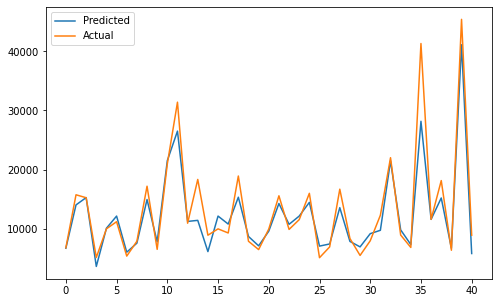

In [58]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [59]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [60]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -0.005204770442303095


In [61]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [63]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [64]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [65]:
elasticnet.score(X_train, y_train)

0.8099052859923915

In [66]:
y_pred_en = elasticnet.predict(X_test)

In [67]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [68]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.5}

Using  {'alpha': 0.01, 'l1_ratio': 0.5}  the negative mean squared error is:  -0.004799769352225591


In [69]:
y_pred_elastic = elastic_regressor.predict(X_test)

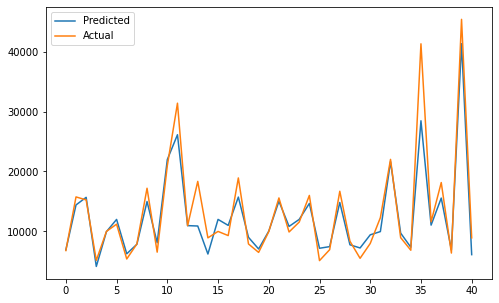

In [70]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()